In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

data1 = pd.read_csv('./output/juliap_job.txt', header=None, names=['n', 'p', 'time'])
data2 = pd.read_csv('./output/juliap2_job.txt', header=None, names=['schedule', 'n', 'p', 'time'])
data3 = pd.read_csv('./output/filter_strong_job.txt', header=None, names=['n', 'p', 'r', 'time'], quoting=csv.QUOTE_ALL)
data4 = pd.read_csv('./output/filter_weak_job.txt', header=None, names=['n', 'p', 'r', 'time'], quoting=csv.QUOTE_ALL)

data1.to_csv('./output/juliap_job.csv', index=False)
data2.to_csv('./output/juliap2_job.csv', index=False)
data3.to_csv('./output/filter_strong_job.csv', index=False)
data4.to_csv('./output/filter_weak_job.csv', index=False)

print(data1.head())
print(data2.head())
print(data3.head())
print(data4.head())


    n  p      time
0  90  1  0.110155
1  90  1  0.109749
2  90  1  0.109885
3  90  2  0.056617
4  90  2  0.056599
   schedule     n   p      time
0    static  1100  16  2.450491
1    static  1100  16  2.448260
2    static  1100  16  2.449136
3  static,1  1100  16  2.448672
4  static,1  1100  16  2.446850
      n  p  r      time
0  1168  1  1  0.060387
1  1168  1  1  0.060741
2  1168  1  1  0.060032
3  1168  2  1  0.196807
4  1168  2  1  0.245200
      n    p    r      time
0  1168  1.0  1.0  0.060196
1  1168  1.0  1.0  0.060900
2  1168  1.0  1.0  0.060195
3  1168  2.0  2.0  0.401089
4  1168  2.0  2.0  0.635222


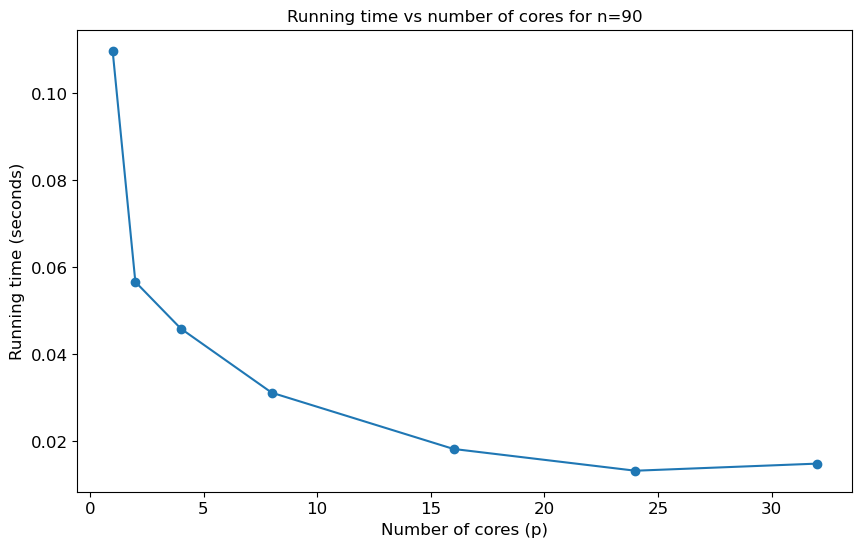

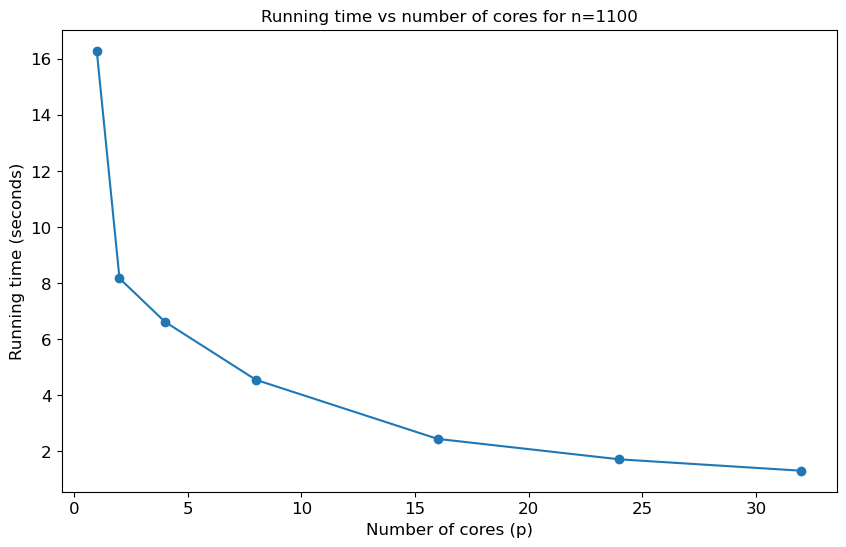

In [85]:
def plot_running_time(data, n, filename):
    filtered_data = data[data['n'] == n]
    grouped_data = filtered_data.groupby('p')['time'].min().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data['p'], grouped_data['time'], marker='o')
    plt.xlabel('Number of cores (p)',fontsize=12)
    plt.ylabel('Running time (seconds)',fontsize=12)
    plt.title(f'Running time vs number of cores for n={n}',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(filename)
    plt.show()

plot_running_time(data1, 90, "./output/juliap_job_90")
plot_running_time(data1, 1100, "./output/juliap_job_1100")


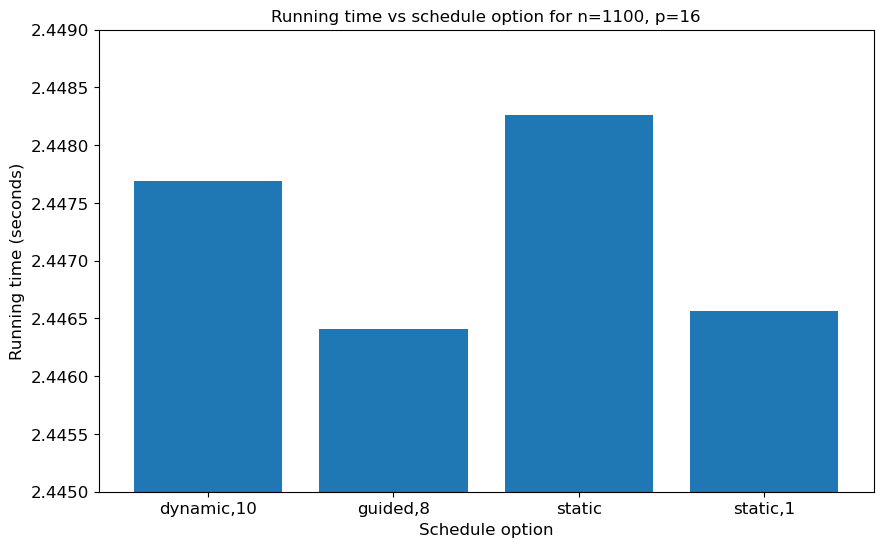

In [86]:
def plot_bar_schedule_time(data, n, p, filename):
    filtered_data = data[(data['n'] == n) & (data['p'] == p)]
    grouped_data = filtered_data.groupby('schedule')['time'].min().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(grouped_data['schedule'], grouped_data['time'])
    plt.xlabel('Schedule option',fontsize=12)
    plt.ylabel('Running time (seconds)',fontsize=12)
    plt.title(f'Running time vs schedule option for n={n}, p={p}',fontsize=12)
    plt.ylim(2.445, 2.449)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(filename)
    plt.show()


plot_bar_schedule_time(data2, 1100, 16, "./output/juliap2_job")


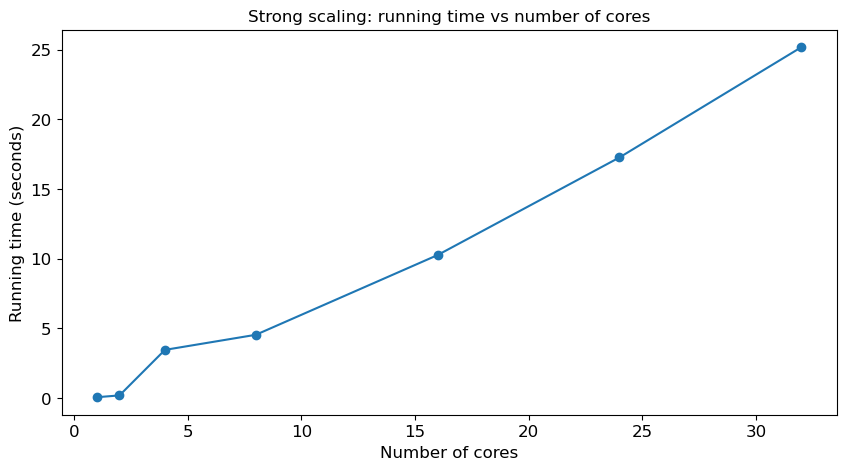

In [89]:
strong_scaling_min_time = data3.groupby('p')['time'].min().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(strong_scaling_min_time['p'], strong_scaling_min_time['time'], marker='o', linestyle='-')
plt.xlabel('Number of cores',fontsize=12)
plt.ylabel('Running time (seconds)',fontsize=12)
plt.title('Strong scaling: running time vs number of cores',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./output/strong_scaling_plot.png')
plt.show()

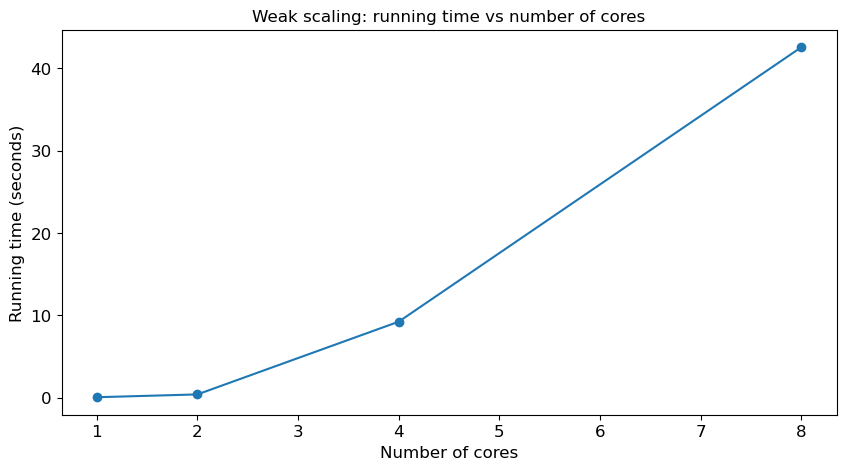

In [90]:
weak_scaling_min_time = data4.groupby('p')['time'].min().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(weak_scaling_min_time['p'], weak_scaling_min_time['time'], marker='o', linestyle='-')
plt.xlabel('Number of cores',fontsize=12)
plt.ylabel('Running time (seconds)',fontsize=12)
plt.title('Weak scaling: running time vs number of cores',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./output/weak_scaling_plot.png')
plt.show()